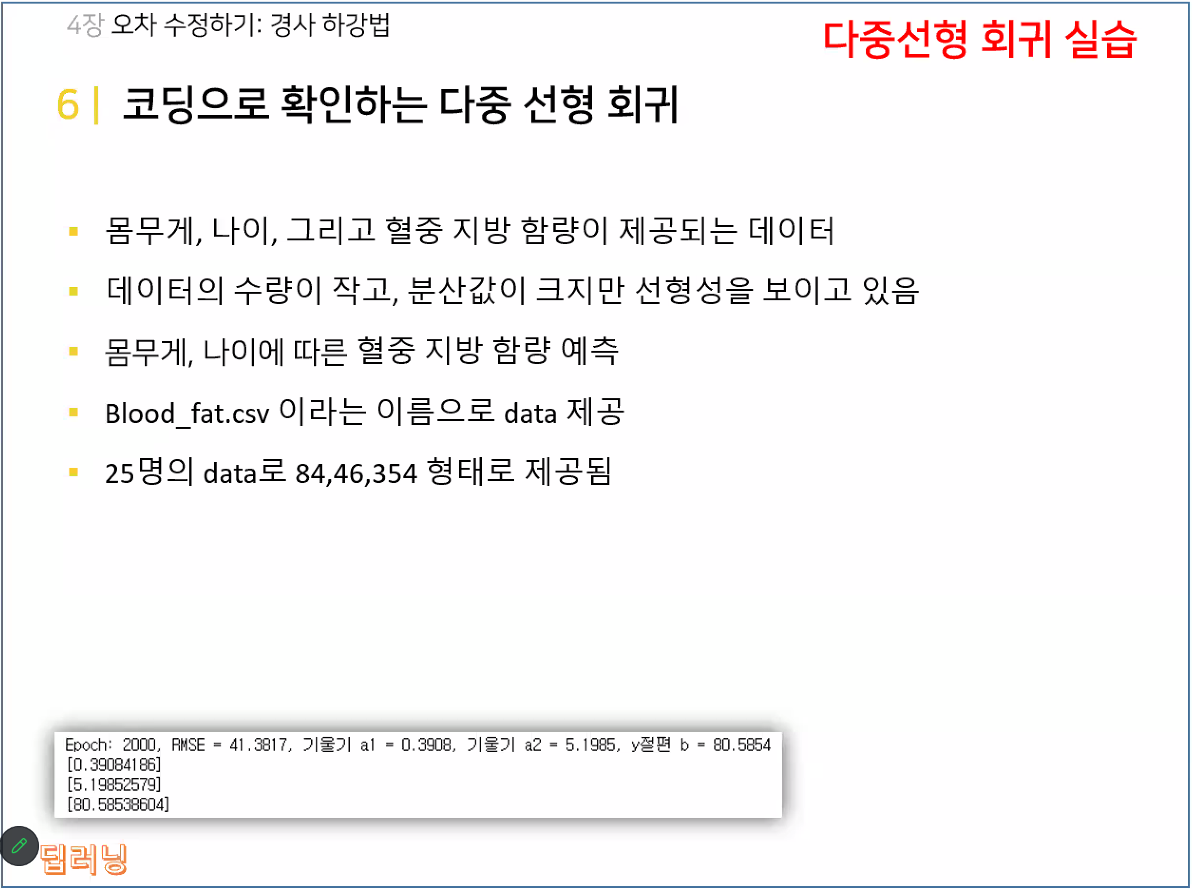

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = np.loadtxt("C:/Users/eundo/OneDrive/바탕 화면/스터디/인공지능 마스터 2기/data/Blood_fat.csv", delimiter= ",")

In [3]:
data

array([[ 84.,  46., 354.],
       [ 73.,  20., 190.],
       [ 65.,  52., 405.],
       [ 70.,  30., 263.],
       [ 76.,  57., 451.],
       [ 69.,  25., 302.],
       [ 63.,  28., 288.],
       [ 72.,  36., 385.],
       [ 79.,  57., 402.],
       [ 75.,  44., 365.],
       [ 27.,  24., 209.],
       [ 89.,  31., 290.],
       [ 65.,  52., 346.],
       [ 57.,  23., 254.],
       [ 59.,  60., 395.],
       [ 69.,  48., 434.],
       [ 60.,  34., 220.],
       [ 79.,  51., 374.],
       [ 75.,  50., 308.],
       [ 82.,  34., 220.],
       [ 59.,  46., 311.],
       [ 67.,  23., 181.],
       [ 85.,  37., 274.],
       [ 55.,  40., 303.],
       [ 63.,  30., 244.]])

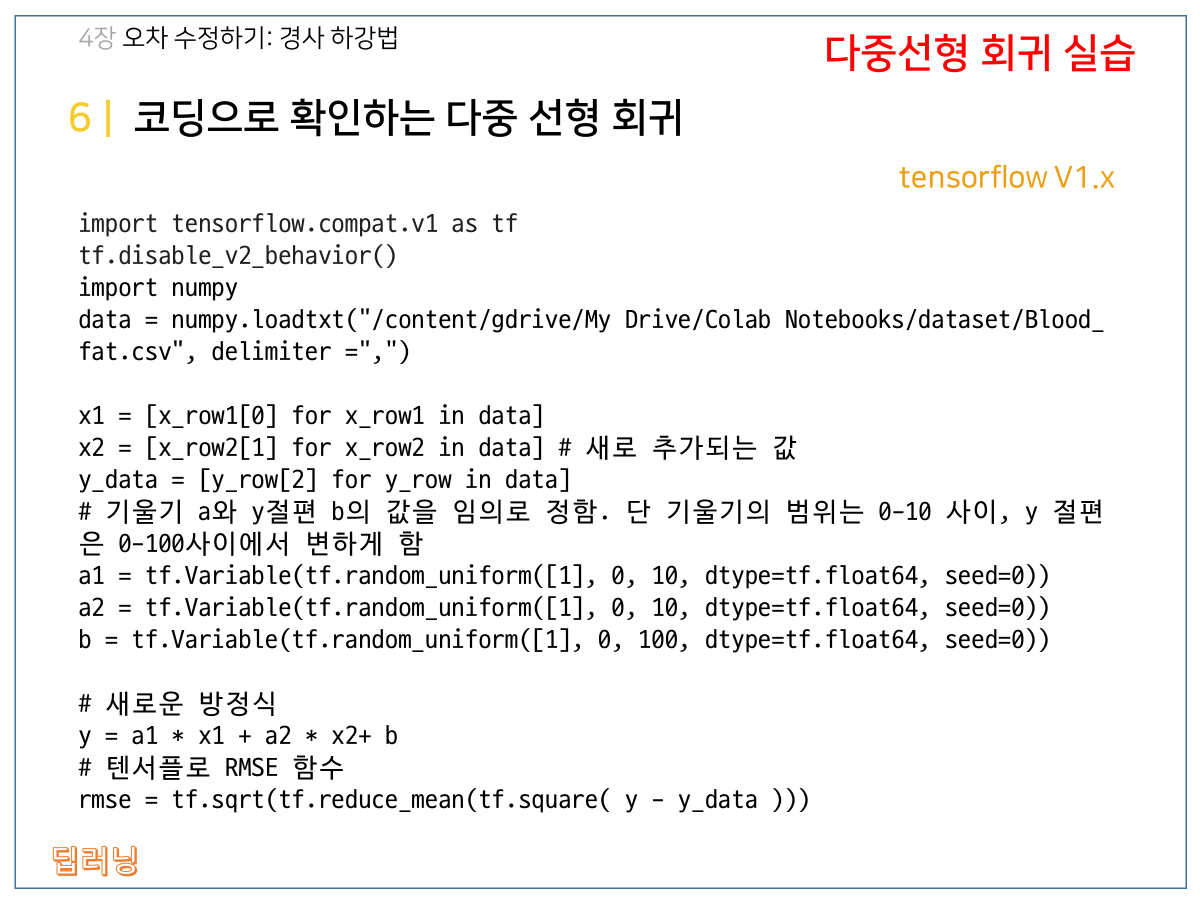
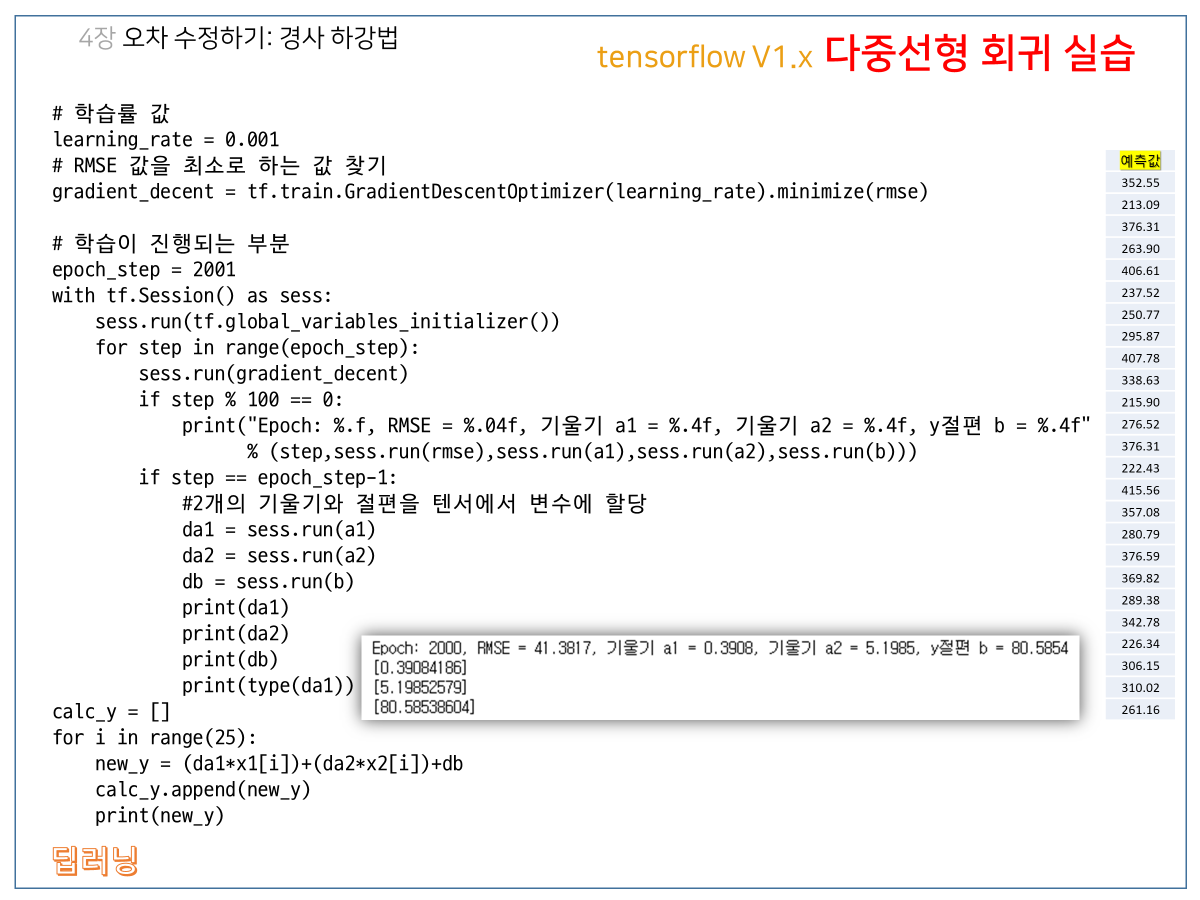
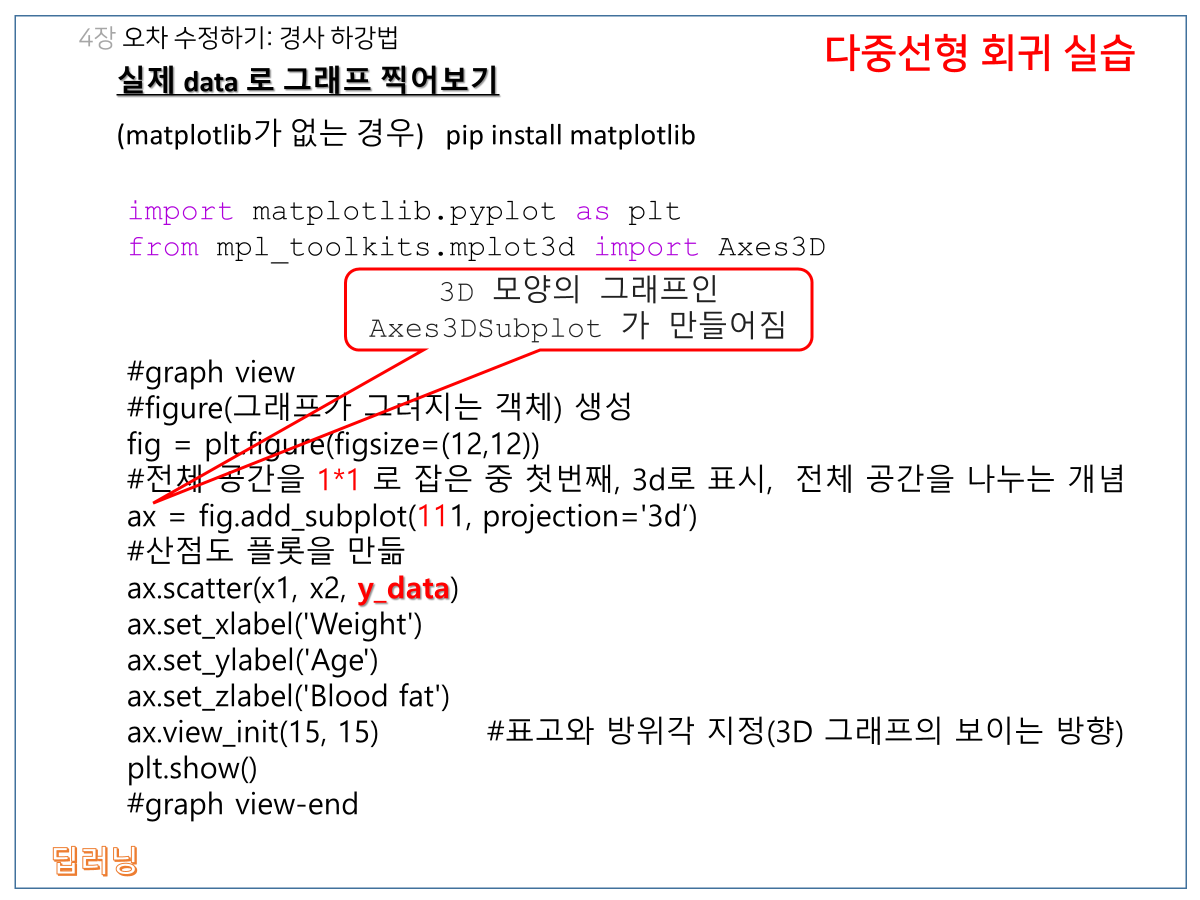

In [4]:
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

a1 = tf.Variable(tf.random.uniform([1], 0, 10, dtype =tf.float64, seed = 0))
a2 = tf.Variable(tf.random.uniform([1], 0, 10, dtype =tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype =tf.float64, seed = 0))

y = a1 * x1 + a2 * x2 + b
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [5]:
learning_rate = 0.001
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

epoch_step = 2001
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(epoch_step):
        sess.run(gradient_descent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y 절편 b = %.4f" % (step, sess.run(rmse), sess.run(a1),sess.run(a2), sess.run(b)))
        if step == epoch_step-1:
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)
            print(type(da1))
calc_y = []
for i in range(25):
    new_y = (da1 * x1[i]) + (da2 * x2[i]) + db
    calc_y.append(new_y)
    print(new_y)


Epoch: 0, RMSE = 643.9146, 기울기 a1 = 7.9995, 기울기 a2 = 8.0295, y 절편 b = 80.6891
Epoch: 100, RMSE = 51.0198, 기울기 a1 = 1.2999, 기울기 a2 = 4.2778, y 절편 b = 80.5946
Epoch: 200, RMSE = 42.6573, 기울기 a1 = 0.8654, 기울기 a2 = 4.3693, y 절편 b = 80.5900
Epoch: 300, RMSE = 42.1239, 기울기 a1 = 0.7509, 기울기 a2 = 4.5693, y 절편 b = 80.5895
Epoch: 400, RMSE = 41.8101, 기울기 a1 = 0.6632, 기울기 a2 = 4.7227, y 절편 b = 80.5890
Epoch: 500, RMSE = 41.6278, 기울기 a1 = 0.5962, 기울기 a2 = 4.8396, y 절편 b = 80.5887
Epoch: 600, RMSE = 41.5226, 기울기 a1 = 0.5454, 기울기 a2 = 4.9284, y 절편 b = 80.5883
Epoch: 700, RMSE = 41.4623, 기울기 a1 = 0.5069, 기울기 a2 = 4.9956, y 절편 b = 80.5880
Epoch: 800, RMSE = 41.4277, 기울기 a1 = 0.4778, 기울기 a2 = 5.0465, y 절편 b = 80.5878
Epoch: 900, RMSE = 41.4080, 기울기 a1 = 0.4558, 기울기 a2 = 5.0850, y 절편 b = 80.5875
Epoch: 1000, RMSE = 41.3967, 기울기 a1 = 0.4392, 기울기 a2 = 5.1141, y 절편 b = 80.5873
Epoch: 1100, RMSE = 41.3902, 기울기 a1 = 0.4266, 기울기 a2 = 5.1361, y 절편 b = 80.5871
Epoch: 1200, RMSE = 41.3865, 기울기 a1 = 0.4171, 기울기 

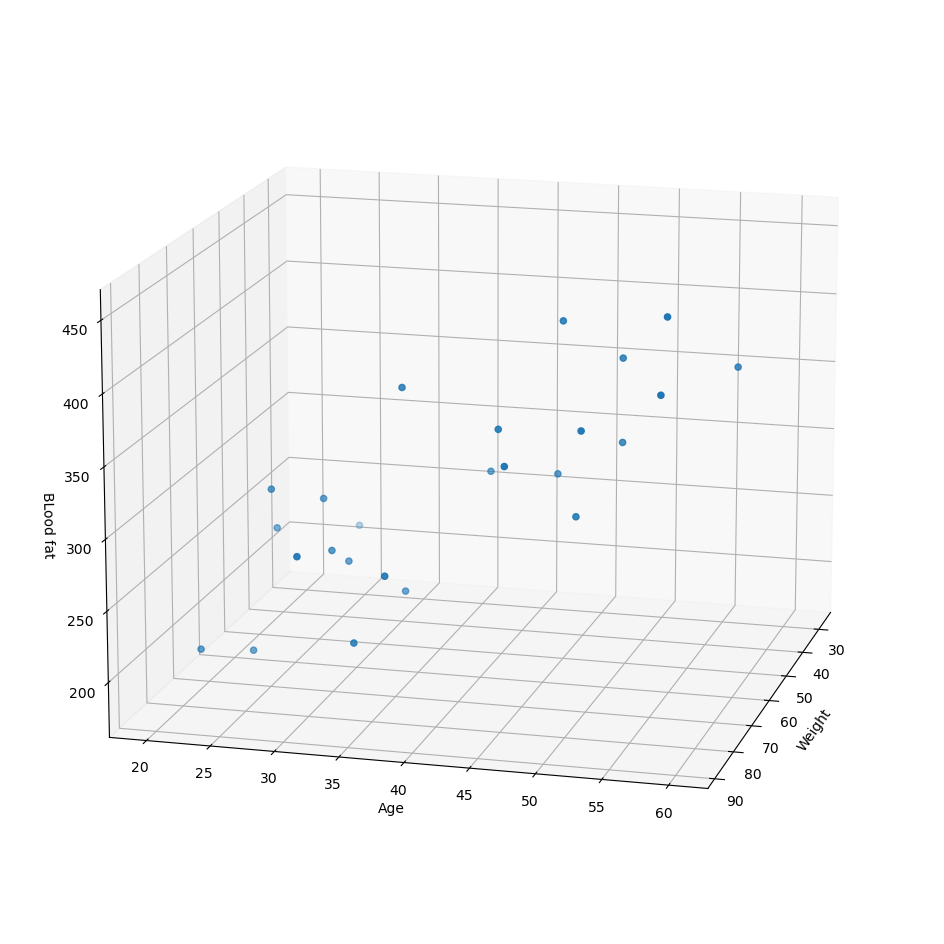

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, x2, y_data)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("BLood fat")
ax.view_init(15, 15)
plt.show()

In [7]:
cal_y = (da1 * 75) + (da2 * 45) +db
print(cal_y)

[343.83218602]
